In [30]:
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats
from math import *

In [31]:
def MAP(xv_est, yv_est, r):
    global k
    global sigma_x
    global sigma_y
    global sigma_i
    class_conditional_part = 0
    prior = 0
    for i in range(k):
        class_conditional_part += (r[i]-((xv_est - X_ref[0][i])**2 + (yv_est - X_ref[1][i])**2)**(0.5))**2 / sigma_i**2
    prior = (xv_est/sigma_x)**2 + (yv_est/sigma_y)**2

    return prior + class_conditional_part

In [49]:
sigma_i = 0.3
sigma_x = 0.25
sigma_y = 0.25

X_T = np.zeros((2,1))
theta = 2*pi*np.random.rand(1)
a = np.random.rand(1)
X_T[0][0] = a * cos(theta)
X_T[1][0] = a * sin(theta)

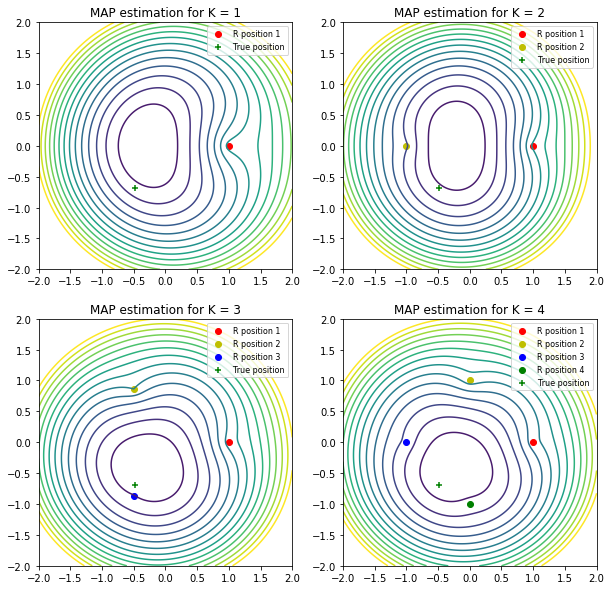

In [55]:
plt.figure(figsize=(10,10))
for k in range(1,5):
    X_ref = np.zeros((2,k))
    for i in range(k):
        theta_i = i * 2*pi/k
        X_ref[0][i] = cos(theta_i)
        X_ref[1][i] = sin(theta_i)

    r = np.zeros(k)
    d = np.zeros(k)
    j = 0
    while j < k:
        d[j] = sqrt((X_T[0][0]-X_ref[0][j])**2 + (X_T[1][0]-X_ref[1][j])**2)
        r[j] = d[j] + np.random.normal(0,sigma_i**2)
        if r[j] >= 0:
            j += 1

    colorlist = ['r', 'y', 'b', 'g']
    lablelist = ['R position 1', 'R position 2', 'R position 3', 'R position 4']
    plt.subplot(2,2,k)
    x_est = np.linspace(-2, 2, 1000)
    y_est = np.linspace(-2, 2, 1000)
    X_est, Y_est = np.meshgrid(x_est, y_est)
    f = MAP(X_est, Y_est, r)
    fmin = f.min() 
    fmax= f.max()
    c = plt.contour(x_est, y_est, f, fmin+int(fmax-fmin)*np.linspace(0,0.5,15))
    for i in range(k):
        plt.scatter(X_ref[0][i],X_ref[1][i], marker='o', c=colorlist[i], label=lablelist[i])
    plt.scatter(X_T[0],X_T[1], marker='+', c='g', label = 'True position')
    plt.legend(fontsize='8')
    plt.title('MAP estimation for K = %d'%k)

plt.show()

In [ ]:
'''how my codes work:
        1. set the parameters ralated and generate a randomized true position
        2. generate landmark
        3. generate distance with noise
        4. gengerate plot with increasing K'''
'''comments and conclusion:
        1. the refenrence position is getting more certain and accurate with increasing K
        2. its clear that the noise has influence on the estimation. A large noise will make the degree of confidence of the estimation getting lower, but somehow a small noise will make the estimation with not enough robust.
        3. it seems in some cases when K= 3, the reference position is closer to the true position than when K=4.'''